In [2]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [4]:
mental_health = pd.read_csv('mental_health.csv')

# Subsetting dataframe so that it only focuses on people from US:
mental_health = mental_health[(mental_health['Question 3']=='United States') | (mental_health['Question 3']=='United States of America')]

# Cleaning up race variables
mental_health["Question 89"]= mental_health["Question 89"].replace(["European American","Caucasian"], "White") 
mental_health["Question 89"]= mental_health["Question 89"].replace(["White Hispanic"], "Hispanic") 
mental_health["Question 89"]= mental_health["Question 89"].replace(["More than one of the above"], "Mixed Race") 
mental_health["Question 89"]= mental_health["Question 89"].replace(["Hispanic"], np.NAN) 
mental_health["Question 89"]= mental_health["Question 89"].replace(["American Indian or Alaska Native"], np.NAN) 
mental_health["Question 89"]= mental_health["Question 89"].replace(["Black or African American"],"Black") 

In [6]:
def getColor(c, N, idx):
    import matplotlib as mpl
    cmap = mpl.cm.get_cmap(c)
    norm = mpl.colors.Normalize(vmin=0.0, vmax=N - 1)
    return cmap(norm(idx))

In [7]:
def stacked_bar_comp(trait,feature,title,xlabel,proportions = True, stacked = True,xticks=np.NAN,figsize = [10,7], legend_title = '',smallxticks = False):
    
    # If proportions = False passed, plot shows frequencies, instead of proportions
    # If stacked = False passed, stacked bars are shown in pieces, alongside one another
    # If smallxticks = True passed, x-axis ticks are reduced in size

    # If an array for xticks is passed, the x-axis tick values are revalued to match the passed array
    # If a string for legend_title is passed, the legend will have a title that matches passed string
  
    crosstabed=pd.crosstab(mental_health[trait],mental_health[feature])
    cross_props= crosstabed.div(crosstabed.sum(axis=1), axis=0)

    # The column for age has some obvious outliers: -1,99, and 323
    if trait == 'Question 1':
        for i in [-1,99,323]:
            try:
                cross_props = cross_props.drop([i])
            except:
                pass
    if feature =='Question 1':
        for i in [-1,99,323]:
            try:
                cross_props = cross_props.drop(columns=[i])
            except:
                pass
    
    featured = mental_health[feature].astype(str)
    legend=np.unique(featured)
    
    if proportions == True:
        cross_props.plot.bar(stacked=stacked, figsize=(figsize[0],figsize[1]),color = getColor('YlGnBu',len(legend),range(len(legend))))
        plt.ylabel('Proportion')
    else: 
        crosstabed.plot.bar(stacked=stacked, figsize=(figsize[0],figsize[1]),color = getColor('YlGnBu',len(legend),range(len(legend))))
        plt.ylabel('Frequency')

    if smallxticks:
        plt.xticks(fontsize=8 )
    else:
        plt.xticks(fontsize=12)

    plt.xlabel(xlabel)
    plt.title(title)
    
    try:
        plt.xticks(np.arange(len(xticks)), xticks,rotation='horizontal')      
    except:
        pass
        
    plt.legend(title = legend_title)

    plt.show()

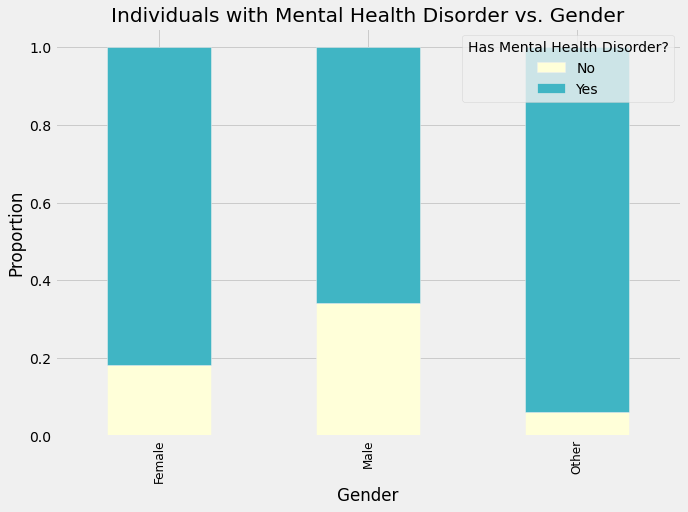

In [37]:
stacked_bar_comp('Question 2', 'Question 34','Individuals with Mental Health Disorder vs. Gender','Gender',legend_title = 'Has Mental Health Disorder?')

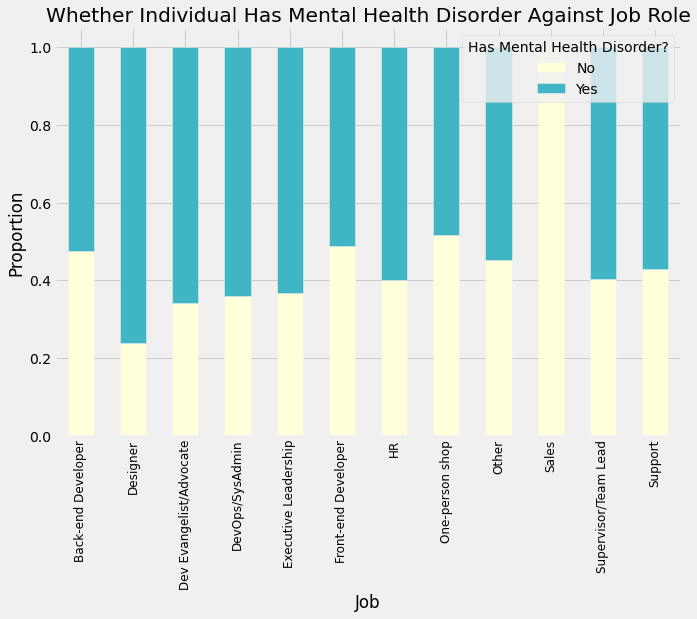

In [10]:
stacked_bar_comp('Question 117', 'Question 34','Whether Individual Has Mental Health Disorder Against Job Role','Job',legend_title = 'Has Mental Health Disorder?')

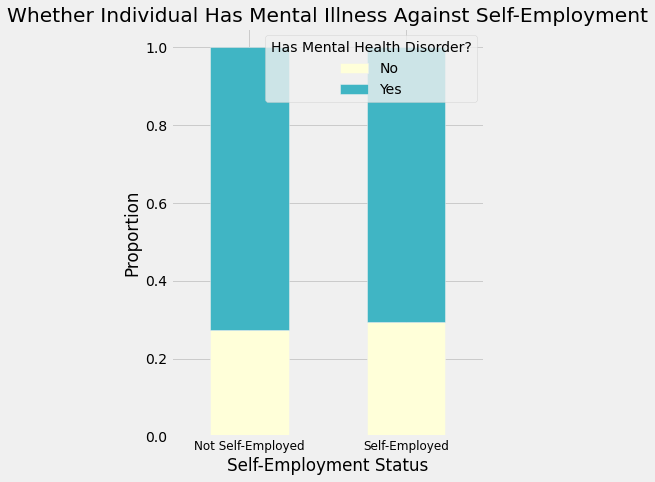

In [41]:
stacked_bar_comp('Question 5', 'Question 34','Whether Individual Has Mental Illness Against Self-Employment','Self-Employment Status',figsize = [5,7], xticks = ['Not Self-Employed','Self-Employed'],legend_title = 'Has Mental Health Disorder?')

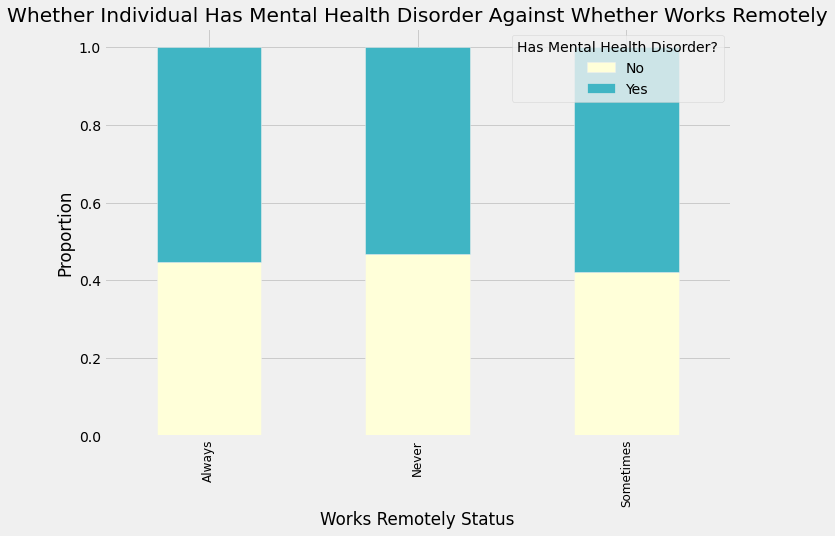

In [43]:
stacked_bar_comp('Question 118', 'Question 34','Whether Individual Has Mental Health Disorder Against Whether Works Remotely','Works Remotely Status',legend_title = 'Has Mental Health Disorder?')

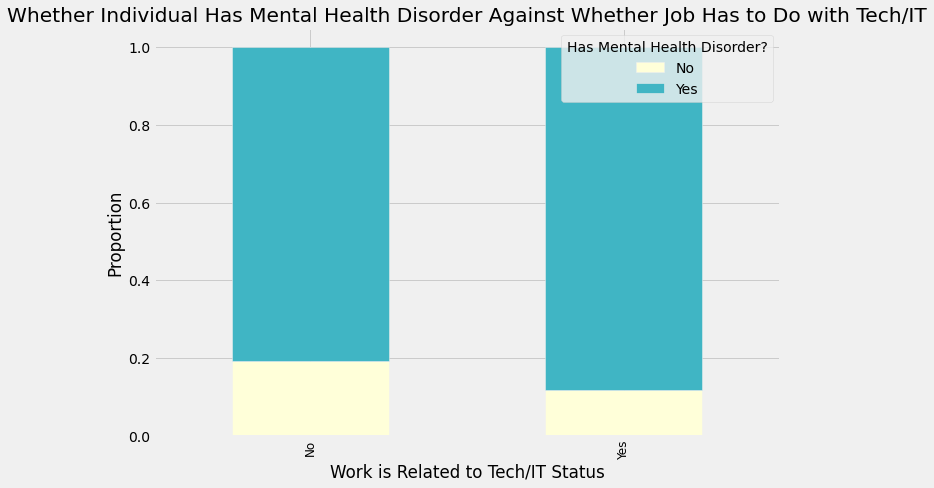

In [13]:
stacked_bar_comp('Question 13', 'Question 34','Whether Individual Has Mental Health Disorder Against Whether Job Has to Do with Tech/IT','Work is Related to Tech/IT Status',legend_title = 'Has Mental Health Disorder?')

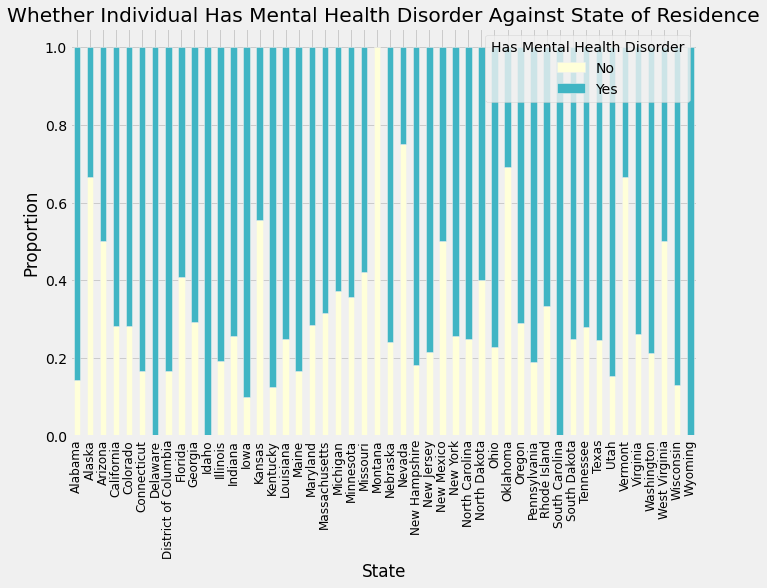

In [14]:
stacked_bar_comp('Question 4', 'Question 34','Whether Individual Has Mental Health Disorder Against State of Residence','State',legend_title = 'Has Mental Health Disorder')

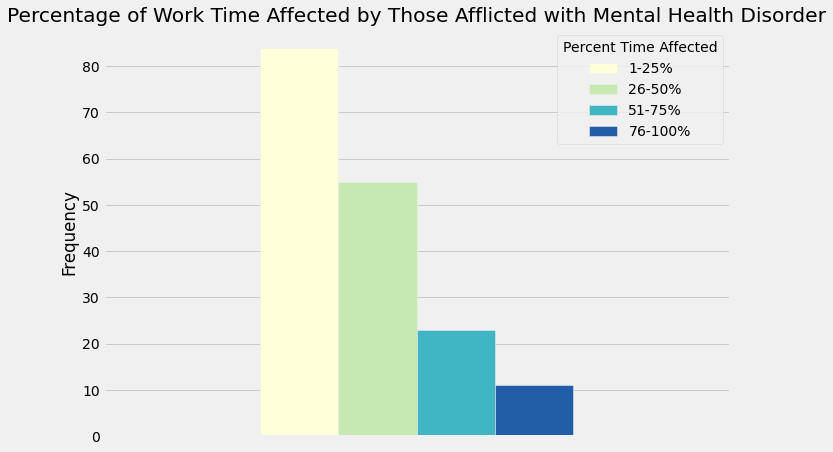

In [22]:
stacked_bar_comp('Question 3', 'Question 55','Percentage of Work Time Affected by Those Afflicted with Mental Health Disorder','',proportions = False, stacked = False,xticks = "",legend_title = 'Percent Time Affected')

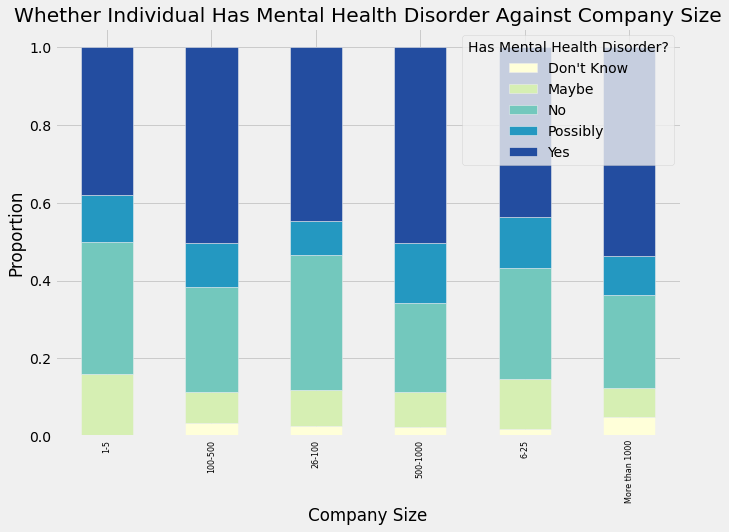

In [23]:
stacked_bar_comp('Question 8', 'Question 33','Whether Individual Has Mental Health Disorder Against Company Size','Company Size',legend_title = 'Has Mental Health Disorder?',smallxticks=True)

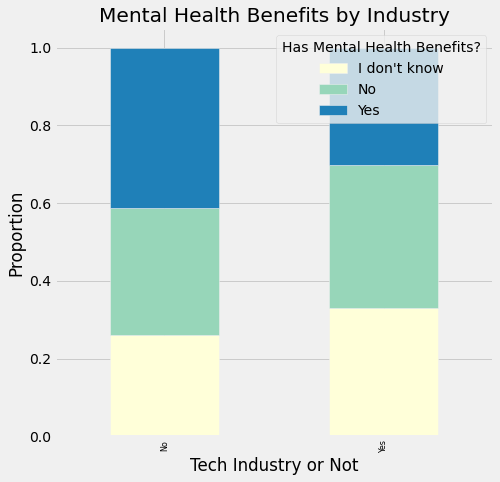

In [44]:
stacked_bar_comp('Question 9', 'Question 16',"Mental Health Benefits by Industry",'Tech Industry or Not',figsize = [7,7], legend_title = 'Has Mental Health Benefits?',smallxticks=True)

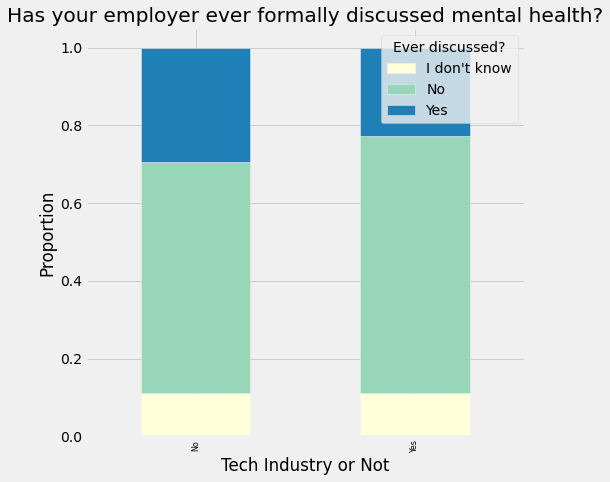

In [25]:
stacked_bar_comp('Question 9', 'Question 15',"Has your employer ever formally discussed mental health?",'Tech Industry or Not',figsize = [7,7],legend_title = 'Ever discussed?',smallxticks=True)

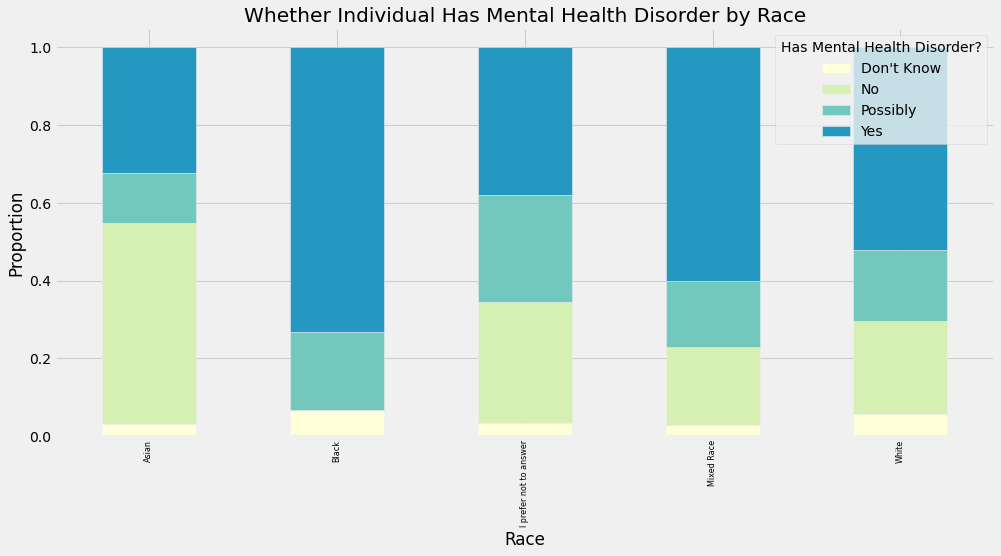

In [45]:
stacked_bar_comp('Question 89', 'Question 33','Whether Individual Has Mental Health Disorder by Race','Race',figsize = [15,7],legend_title = 'Has Mental Health Disorder?',smallxticks=True)

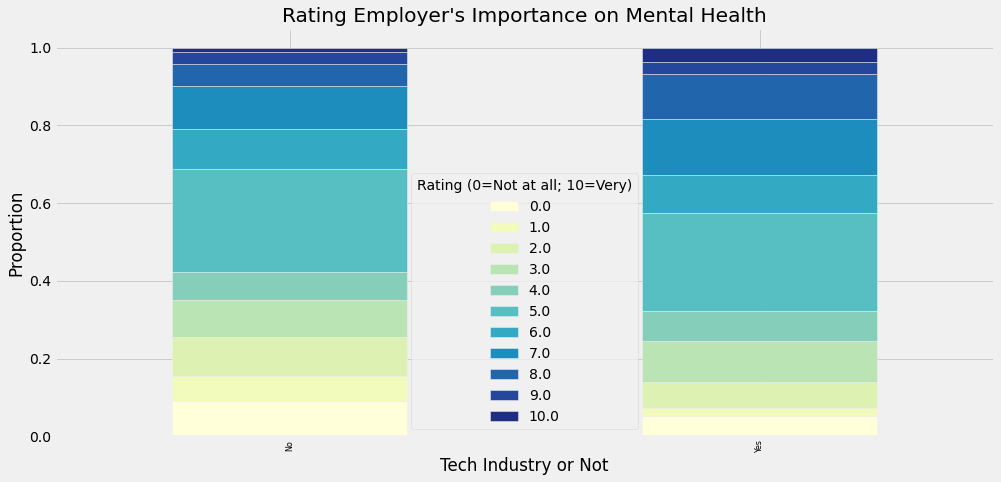

In [33]:
stacked_bar_comp('Question 9', 'Question 65',"Rating Employer's Importance on Mental Health",'Tech Industry or Not',figsize = [15,7], legend_title = 'Rating (0=Not at all; 10=Very)',smallxticks=True)

In [17]:
mental = Table.read_table('mental_health.csv')

In [20]:
mental_age = mental.where('Question 1', are.between(15,80))
mental_yes = mental_age.where('Question 33', are.containing("Yes"))
mental_tech = mental_age.where('Question 9', are.containing("Yes"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


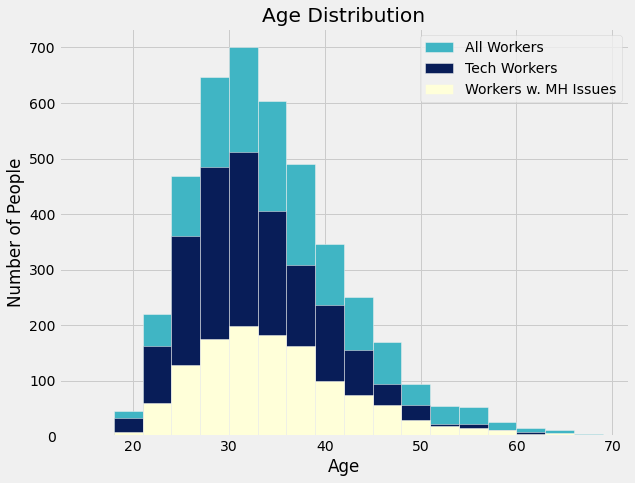

In [47]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.title("Age Distribution")
plt.hist(mental_age.column('Question 1'), bins = range(15,70,3), label = 'All Workers',color =getColor('YlGnBu',3,1))
plt.xlabel("Age")
plt.ylabel("Number of People")

plt.subplot(1,2,1)
plt.hist(mental_tech.column('Question 1'), bins = range(15,70,3), label = 'Tech Workers',color =getColor('YlGnBu',2,1))

plt.subplot(1,2,1)
plt.hist(mental_yes.column('Question 1'), bins = range(15,70,3), label = 'Workers w. MH Issues',color =getColor('YlGnBu',1,1))

plt.legend()